In [109]:
# Data Preprocessing

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
df = pd.read_csv('marketing_data.csv', sep=';')

In [3]:
df

,Age,Education,Marital_Status,Income,Children,Mn_Customer,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,AllSpends
0,63,Graduation,Single,58138.0,0,9,635,88,546,172,88,88,1617
1,66,Graduation,Single,46344.0,2,3,11,1,6,2,1,6,27
2,55,Graduation,Together,71613.0,0,8,426,49,127,111,21,42,776
3,36,Graduation,Together,26646.0,1,2,11,4,20,10,3,5,53
4,39,PhD,Married,58293.0,1,1,173,43,118,46,27,15,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,53,Graduation,Married,61223.0,1,6,709,43,182,42,118,247,1341
2236,74,PhD,Together,64014.0,3,6,406,0,30,0,0,8,444
2237,39,Graduation,Divorced,56981.0,0,1,908,48,217,32,12,24,1241
2238,64,Master,Together,69245.0,1,1,428,30,214,80,30,61,843


In [4]:
df[['Age','Education','Marital_Status','Income','Mn_Customer','MntWines','MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'AllSpends']].describe()
#У списку унікальних значень відсутній nan, але з отриманих віще результатів помітно, що в стовпці доходів користувачів кількість рядків менша, ніж всього в таблиці. Отже, там є пропуски
#Спочатку визначимо як розподіляються дані, за необхідності позбудимось від викидів, а вже після цього визначимо яким методом необхідно заповнити пропущені дані і зробимо це

,Age,Income,Mn_Customer,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,AllSpends
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,51.194196,52247.251354,6.467411,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,605.798214
std,11.984069,25173.076661,3.486695,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,602.249288
min,24.000000,1730.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,43.000000,35303.000000,3.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,68.750000
50%,50.000000,51381.500000,6.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,396.000000
75%,61.000000,68522.000000,10.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,1045.500000
max,127.000000,666666.000000,12.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,2525.000000


In [5]:
df

,Age,Education,Marital_Status,Income,Children,Mn_Customer,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,AllSpends
0,63,Graduation,Single,58138.0,0,9,635,88,546,172,88,88,1617
1,66,Graduation,Single,46344.0,2,3,11,1,6,2,1,6,27
2,55,Graduation,Together,71613.0,0,8,426,49,127,111,21,42,776
3,36,Graduation,Together,26646.0,1,2,11,4,20,10,3,5,53
4,39,PhD,Married,58293.0,1,1,173,43,118,46,27,15,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,53,Graduation,Married,61223.0,1,6,709,43,182,42,118,247,1341
2236,74,PhD,Together,64014.0,3,6,406,0,30,0,0,8,444
2237,39,Graduation,Divorced,56981.0,0,1,908,48,217,32,12,24,1241
2238,64,Master,Together,69245.0,1,1,428,30,214,80,30,61,843


In [6]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
df[['Education']] = LabelEncoder().fit_transform(df[['Education']])
df[['Marital_Status']] = LabelEncoder().fit_transform(df[['Marital_Status']])

C:\Users\38095\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [7]:
df

,Age,Education,Marital_Status,Income,Children,Mn_Customer,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,AllSpends
0,63,2,2,58138.0,0,9,635,88,546,172,88,88,1617
1,66,2,2,46344.0,2,3,11,1,6,2,1,6,27
2,55,2,3,71613.0,0,8,426,49,127,111,21,42,776
3,36,2,3,26646.0,1,2,11,4,20,10,3,5,53
4,39,4,1,58293.0,1,1,173,43,118,46,27,15,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,53,2,1,61223.0,1,6,709,43,182,42,118,247,1341
2236,74,4,3,64014.0,3,6,406,0,30,0,0,8,444
2237,39,2,0,56981.0,0,1,908,48,217,32,12,24,1241
2238,64,3,3,69245.0,1,1,428,30,214,80,30,61,843


In [8]:
# Descriptive Statistics
# Подивимось загальну статистику по кожній з числових метрик, а ткож далі побудуємо графіки розподілу даних по кожній з метрик
df[['Age','Income','Children', 'Mn_Customer', 'MntWines','MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'AllSpends']].describe()

,Age,Income,Children,Mn_Customer,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,AllSpends
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,51.194196,52247.251354,0.950446,6.467411,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,605.798214
std,11.984069,25173.076661,0.751803,3.486695,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,602.249288
min,24.000000,1730.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,43.000000,35303.000000,0.000000,3.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,68.750000
50%,50.000000,51381.500000,1.000000,6.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,396.000000
75%,61.000000,68522.000000,1.000000,10.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,1045.500000
max,127.000000,666666.000000,3.000000,12.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,2525.000000


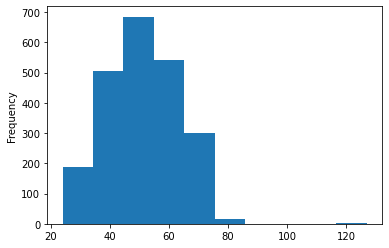

In [9]:
# Age distribution
df['Age'].plot(kind = 'hist')

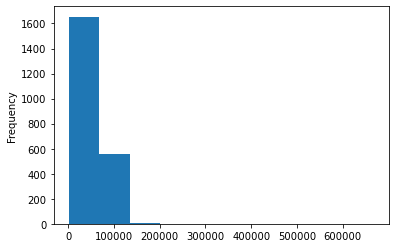

In [10]:
# Income distribution
df['Income'].plot(kind = 'hist')

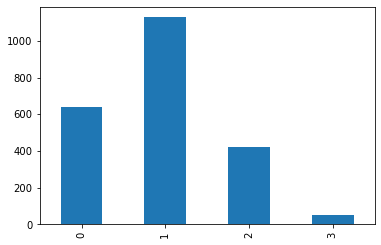

In [11]:
# Children distribution
distribution = df['Children'].value_counts().sort_index()
distribution.plot(kind='bar')

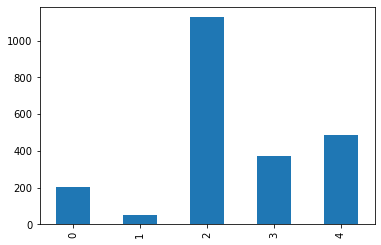

In [12]:
# Mn_Customer distribution
distribution = df['Education'].value_counts().sort_index()
distribution.plot(kind='bar')

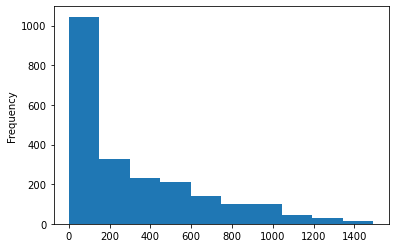

In [13]:
# MntWines distribution
df['MntWines'].plot(kind = 'hist')

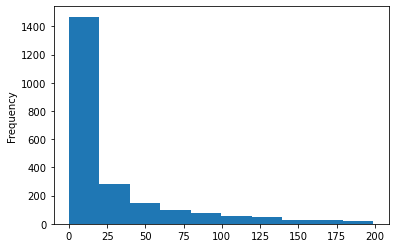

In [14]:
# MntFruits distribution
df['MntFruits'].plot(kind = 'hist')

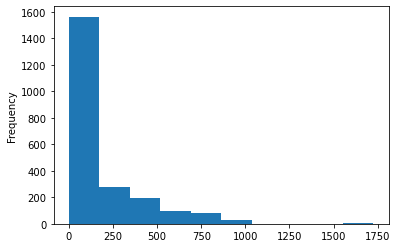

In [15]:
# MntMeatProducts distribution
df['MntMeatProducts'].plot(kind = 'hist')

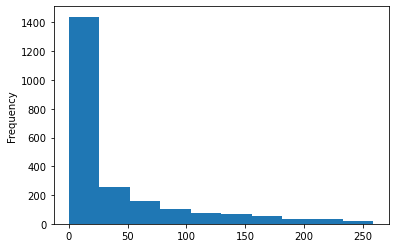

In [16]:
# MntFishProducts distribution
df['MntFishProducts'].plot(kind = 'hist')

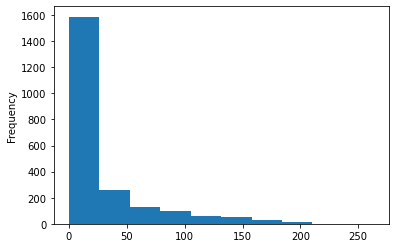

In [17]:
# MntSweetProducts distribution
df['MntSweetProducts'].plot(kind = 'hist')

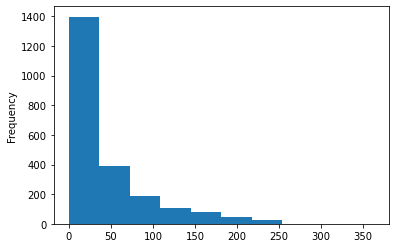

In [18]:
# MntGoldProds distribution
df['MntGoldProds'].plot(kind = 'hist')

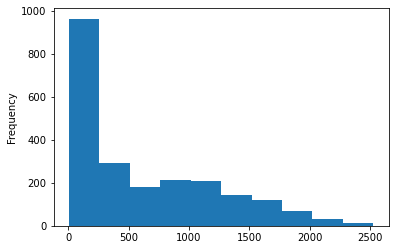

In [19]:
# AllSpends distribution
df['AllSpends'].plot(kind = 'hist')

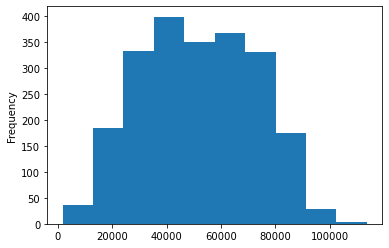

In [20]:
# З отриманих розподілів та загальної статистики помітно, що в деяких спостереженнях у віці, середньорічних доходах та витратах на м'ясні продукти спостерігається помилкові дані (досить великі значення, які суттєво виділяються серед інших)
# Спостереження де є помилкові значення у витратах на м'ясо видалимо з нащих даних
# Дані, які схожі на помилки введення даних в доходах та віці замінимо на пропуски, щоб потім можна було їх заповнити середнім значенням
df.drop(df[df['MntMeatProducts'] > 1000].index, inplace = True)

Age = []
for Age1 in df['Age']:
    if Age1 > 100:
        Age1 = None 
    Age.append(Age1)
df['Age'] = Age

Income = []
for Income1 in df['Income']:
    if Income1 > 120000:
        Income1 = None 
    Income.append(Income1)
df['Income'] = Income

# Побудуємо гістограму за доходами щоб визначити як розподіляються дані
df['Income'].plot(kind = 'hist')

In [21]:
# Descriptive Statistics
# Подивимось загальну статистику по кожній з числових метрик, після усунення помилкових даних
df[['Age','Income','Children', 'Mn_Customer', 'MntWines','MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'AllSpends']].describe()

,Age,Income,Children,Mn_Customer,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,AllSpends
count,2232.00000,2207.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000
mean,51.11828,51655.924785,0.951678,6.471141,304.566890,26.351678,163.627293,37.594631,27.118568,44.107383,603.366443
std,11.70661,20691.574555,0.751835,3.487212,336.707435,39.803162,214.720466,54.669556,41.309852,52.192966,600.716857
min,24.00000,1730.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,43.00000,35221.000000,0.000000,3.000000,24.000000,1.000000,16.000000,3.000000,1.000000,9.000000,68.000000
50%,50.00000,51315.000000,1.000000,6.000000,175.000000,8.000000,67.000000,12.000000,8.000000,24.000000,395.000000
75%,61.00000,68298.500000,1.000000,10.000000,505.000000,33.000000,230.000000,50.000000,33.500000,56.000000,1041.000000
max,80.00000,113734.000000,3.000000,12.000000,1493.000000,199.000000,984.000000,259.000000,263.000000,362.000000,2525.000000


In [22]:
# Оскільки у всіх змінних витрат клієнтів ненормальний розподіл, то прологарифмуємо дані змінні
# Так як мінімальним значенням у цих випадках є 0, то логарифмувати будемо поточне значення + 1

df['MntWines'] = np.log(df['MntWines']+1)
df['MntFruits'] = np.log(df['MntFruits']+1)
df['MntMeatProducts'] = np.log(df['MntMeatProducts']+1)
df['MntFishProducts'] = np.log(df['MntFishProducts']+1)
df['MntSweetProducts'] = np.log(df['MntSweetProducts']+1)
df['MntGoldProds'] = np.log(df['MntGoldProds']+1)
df['AllSpends'] = np.log(df['AllSpends']+1)

In [23]:
# Descriptive Statistics
# Подивимось загальну статистику по кожній з числових метрик після логарифмування даних
df[['Age','Income','Children', 'Mn_Customer', 'MntWines','MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'AllSpends']].describe()

,Age,Income,Children,Mn_Customer,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,AllSpends
count,2232.00000,2207.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000
mean,51.11828,51655.924785,0.951678,6.471141,4.678550,2.241414,4.119375,2.536938,2.242202,3.125065,5.616390
std,11.70661,20691.574555,0.751835,3.487212,1.801661,1.570710,1.555161,1.657965,1.594932,1.286185,1.469648
min,24.00000,1730.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.791759
25%,43.00000,35221.000000,0.000000,3.000000,3.218876,0.693147,2.833213,1.386294,0.693147,2.302585,4.234107
50%,50.00000,51315.000000,1.000000,6.000000,5.170484,2.197225,4.219508,2.564949,2.197225,3.218876,5.981414
75%,61.00000,68298.500000,1.000000,10.000000,6.226537,3.526361,5.442418,3.931826,3.540854,4.043051,6.948897
max,80.00000,113734.000000,3.000000,12.000000,7.309212,5.298317,6.892642,5.560682,5.575949,5.894403,7.834392


In [24]:
# Всі дані входять в межі значень по правилу 3 сігм
# Taking care of missing data
#Пропущені дані за доходами, віком можемо заповнити середнім значенням
from sklearn.impute import SimpleImputer
#numeric
imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean').fit(df[['Income']])
df[['Income']] = imputer_mean.fit_transform(df[['Income']])
df[['Income']] = round(df[['Income']])

imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean').fit(df[['Age']])
df[['Age']] = imputer_mean.fit_transform(df[['Age']])
df[['Age']] = round(df[['Age']])

In [25]:
# Exporting the dataset
df.to_csv('marketing_prep.csv', sep=';', index=False)